In [1]:
# Data Visualization for "To bee or not to bee"
# IG.2412 & IG.2411

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from PIL import Image
import cv2
from tqdm import tqdm
from skimage import measure, feature, color, morphology

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, silhouette_score
)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from scipy.optimize import minimize
from skimage.transform import rotate

# Configuration des chemins
DATA_DIR = "../train" 
IMAGES_DIR = os.path.join(DATA_DIR, "images")
MASKS_DIR = os.path.join(DATA_DIR, "masks")
EXCEL_FILE = os.path.join(DATA_DIR, "classif.xlsx")

Data loaded: 250 samples with 35 features

1. Analyzing class distribution...


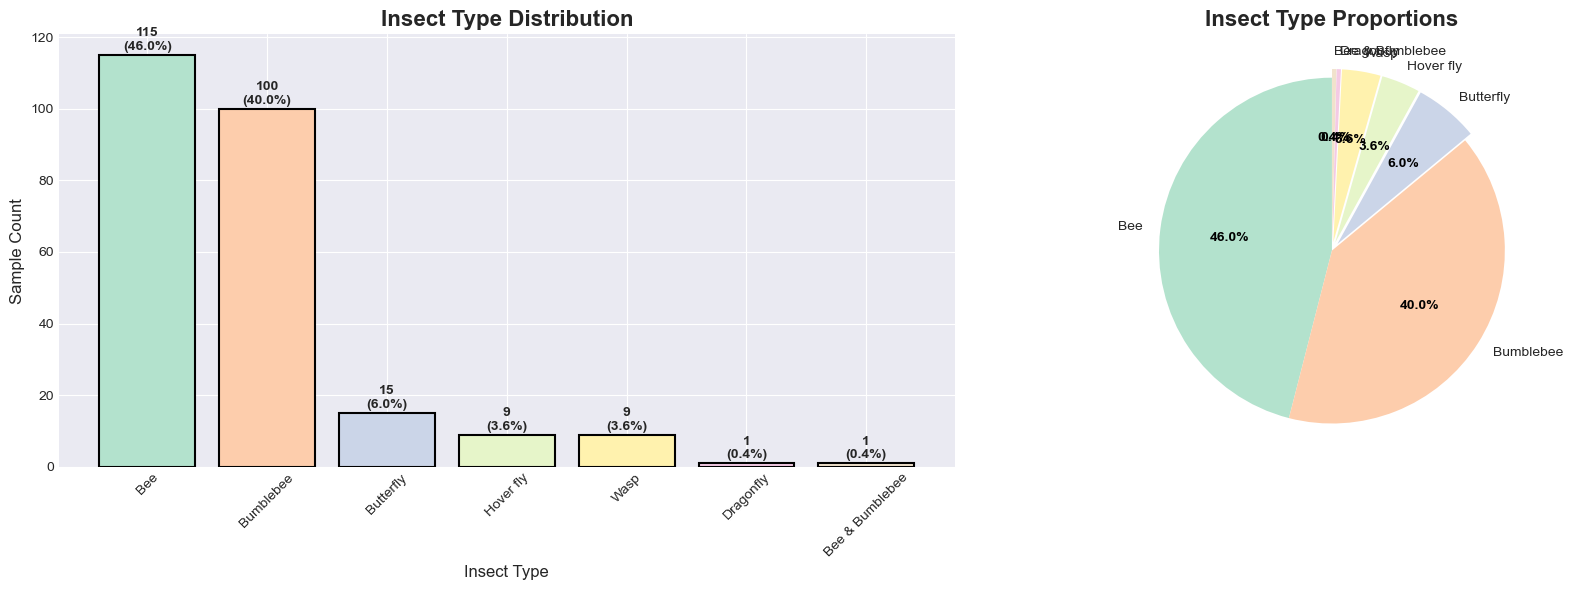

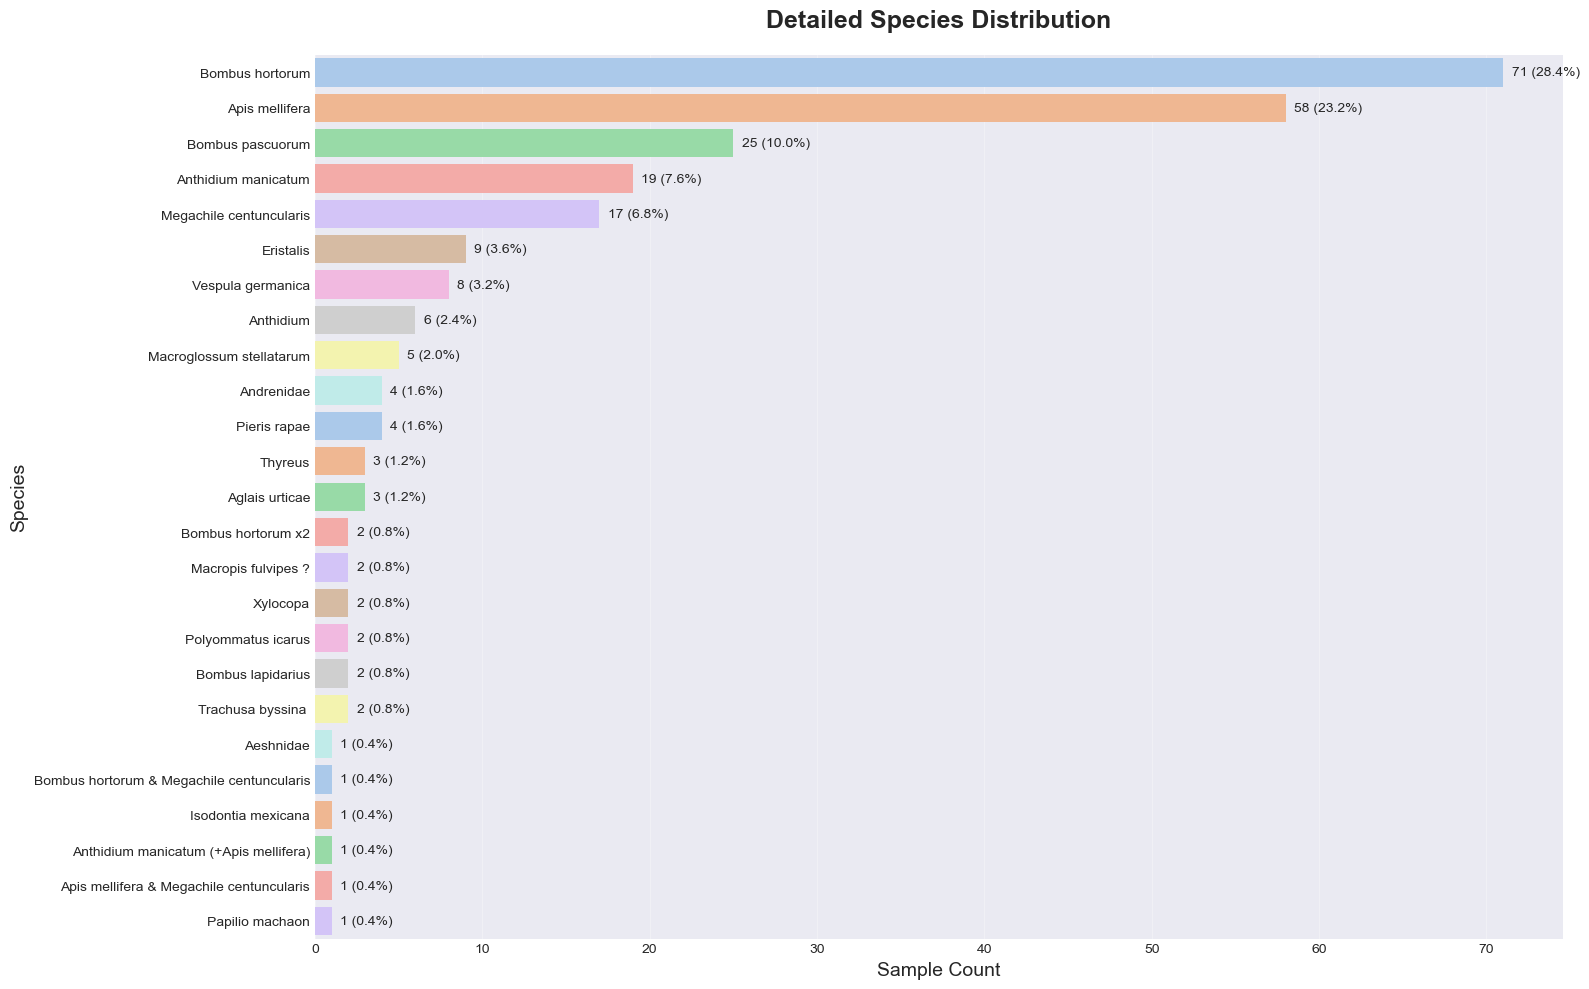


COMMENT - Class Distribution:
- Significant class imbalance: Bee (46%) and Bumblebee (40%) dominate
- Minority classes: Butterfly (6%), Hover fly and Wasp (3.6% each)
- Rare classes: Dragonfly and "Bee & Bumblebee" (0.4% each)
→ This imbalance may affect ML model performance


2. PCA analysis...


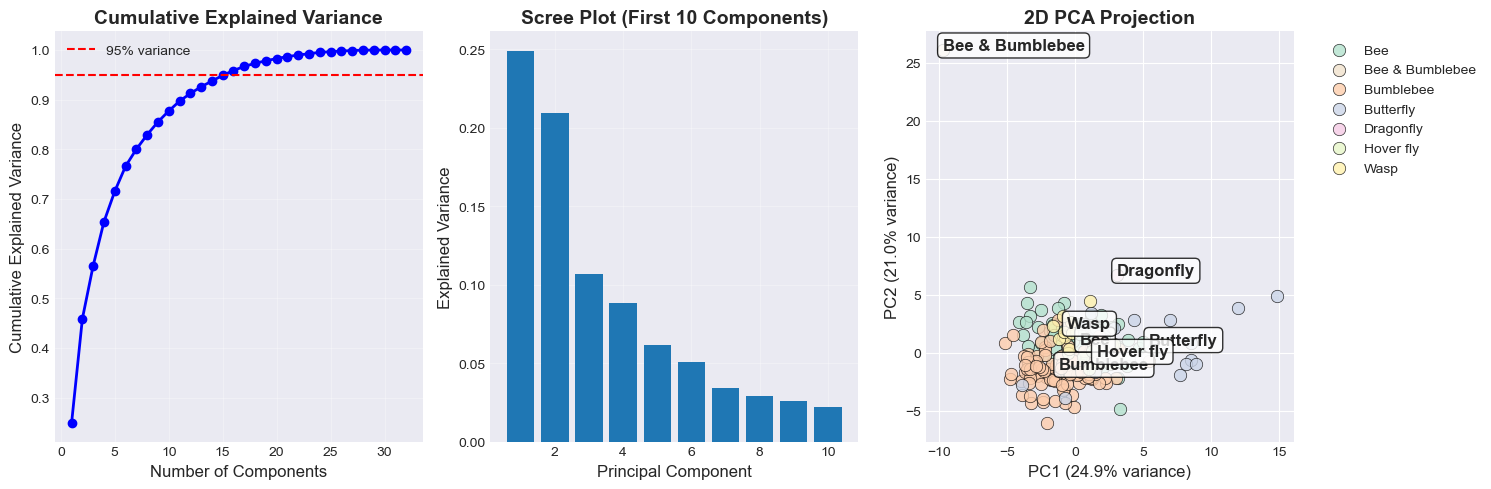


COMMENT - PCA Analysis:
- First 2 components explain 45.9% of variance
- 16 components needed to explain 95% of variance
- Projection shows overlap between Bee and Bumblebee, suggesting similar features
- Minority classes (Butterfly, Dragonfly) appear better separated


3. Analyzing discriminative features...


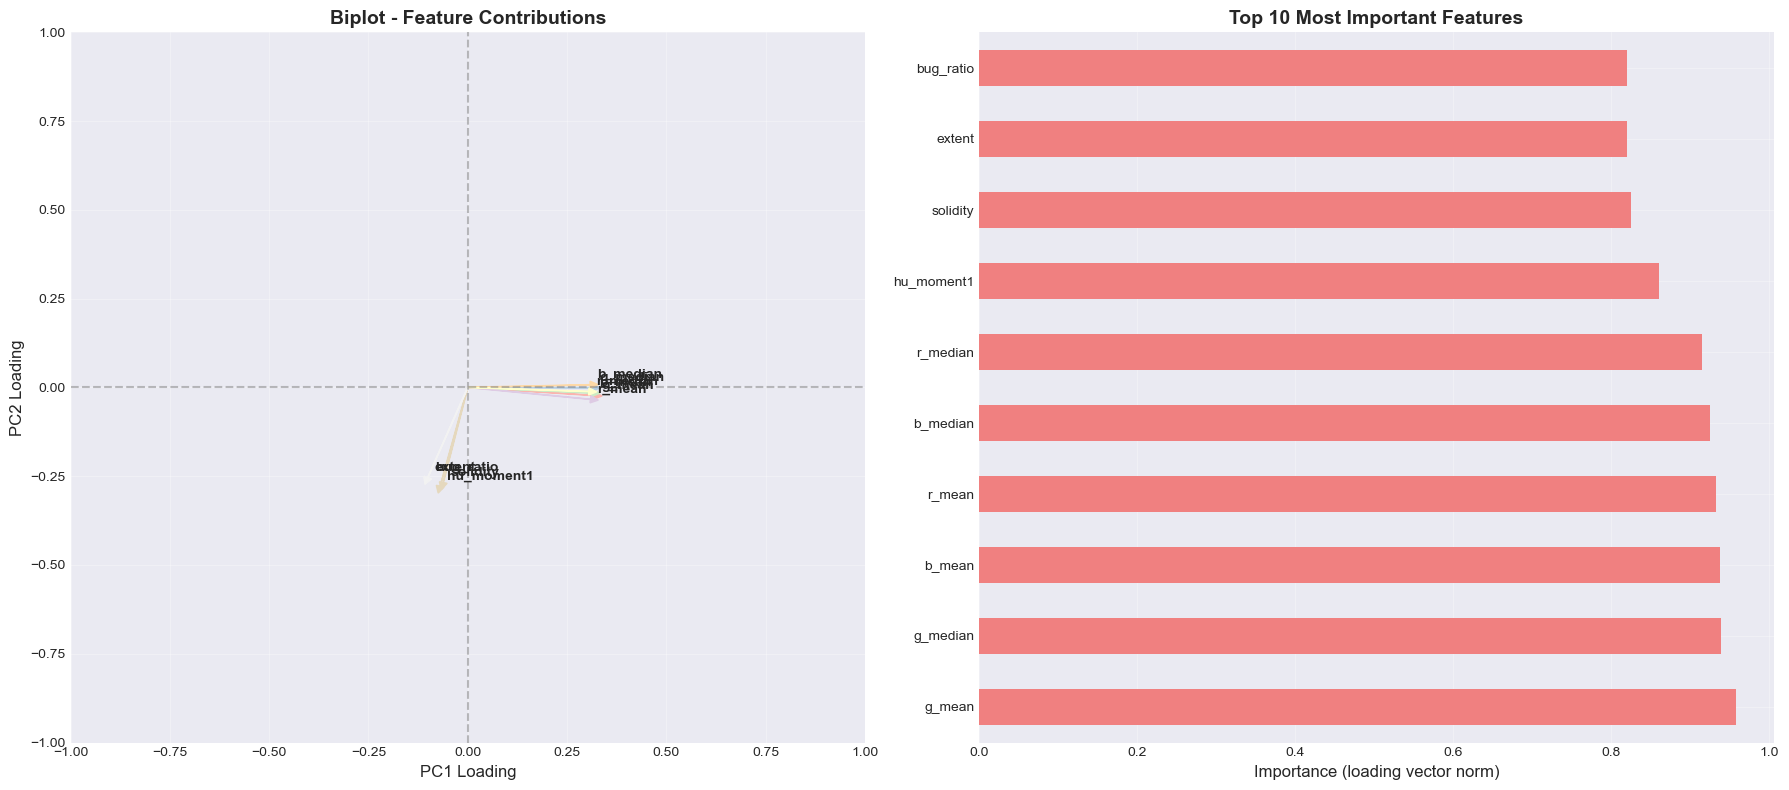


4. Calculating nonlinear projections...
Calculating t-SNE...
Calculating UMAP...
Calculating Isomap...


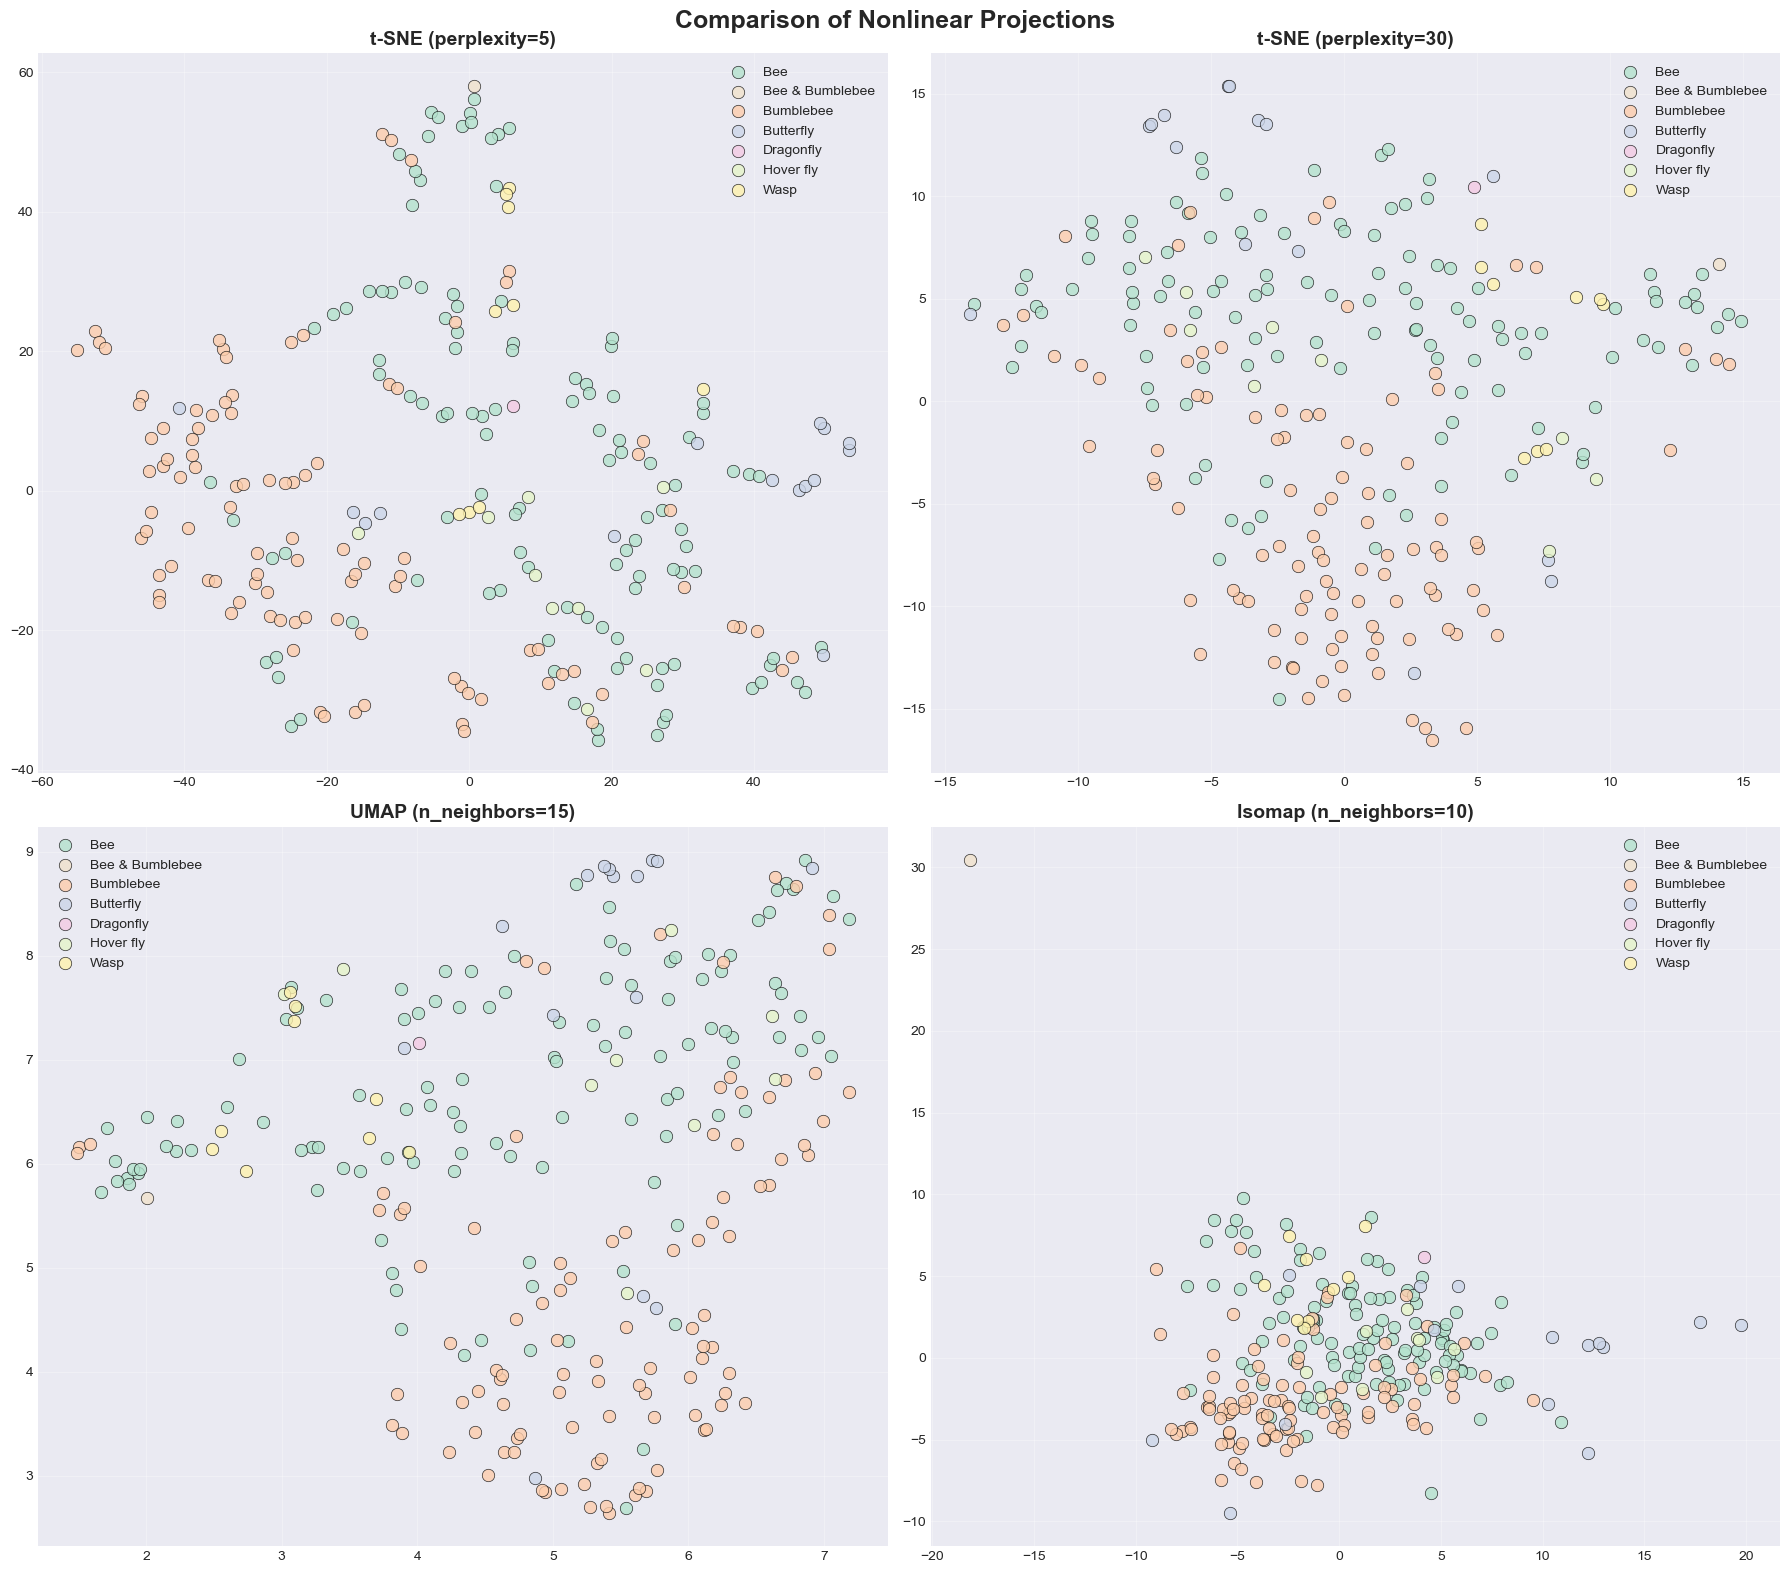


COMMENT - Nonlinear Projections:
- t-SNE (perplexity=5): Forms very tight local clusters, risk of over-segmentation
- t-SNE (perplexity=30): Better global view, Bee and Bumblebee form a continuum
- UMAP: Excellent separation of minority classes (Butterfly, Dragonfly)
- Isomap: Better preserves global structure, shows Bee/Bumblebee proximity
→ Nonlinear methods confirm difficulty separating Bee and Bumblebee


5. Detailed analysis of key features...


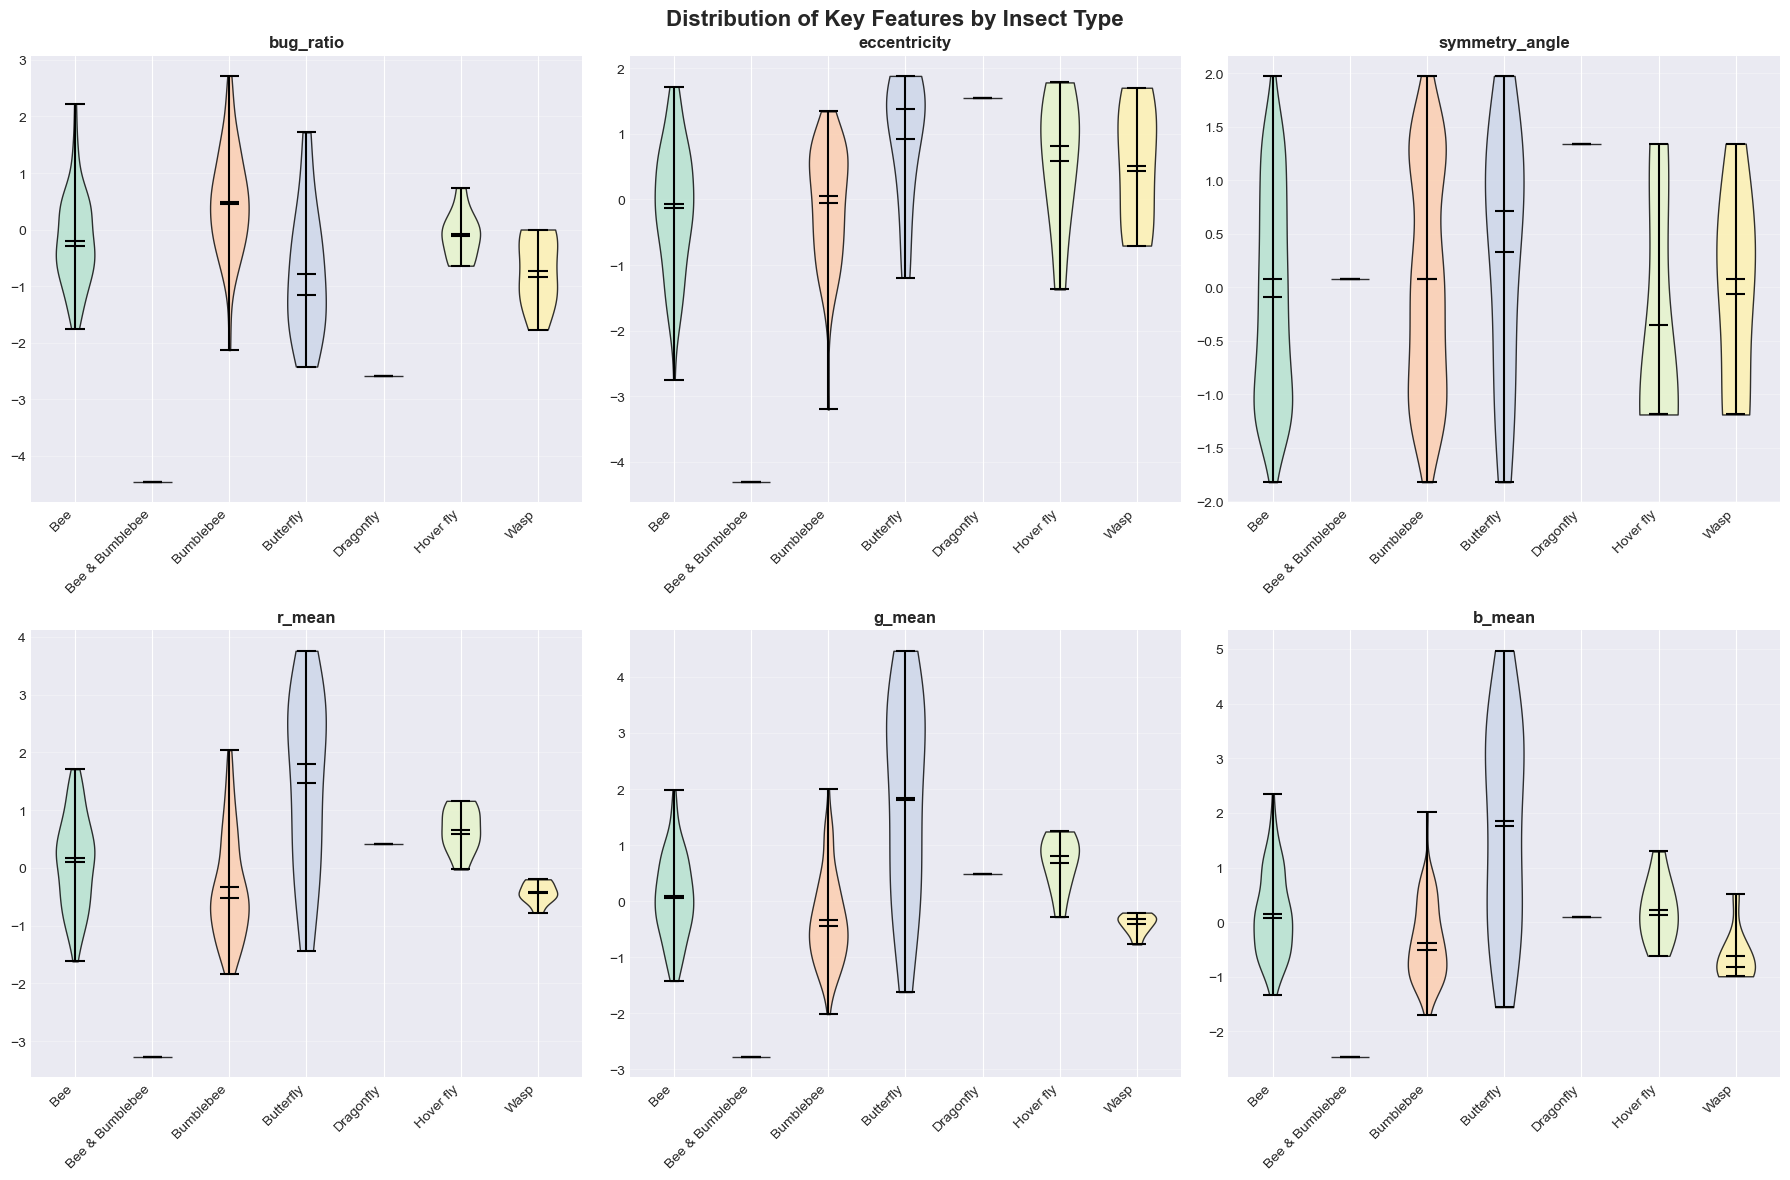


6. Correlation analysis...


<Figure size 2000x1600 with 0 Axes>

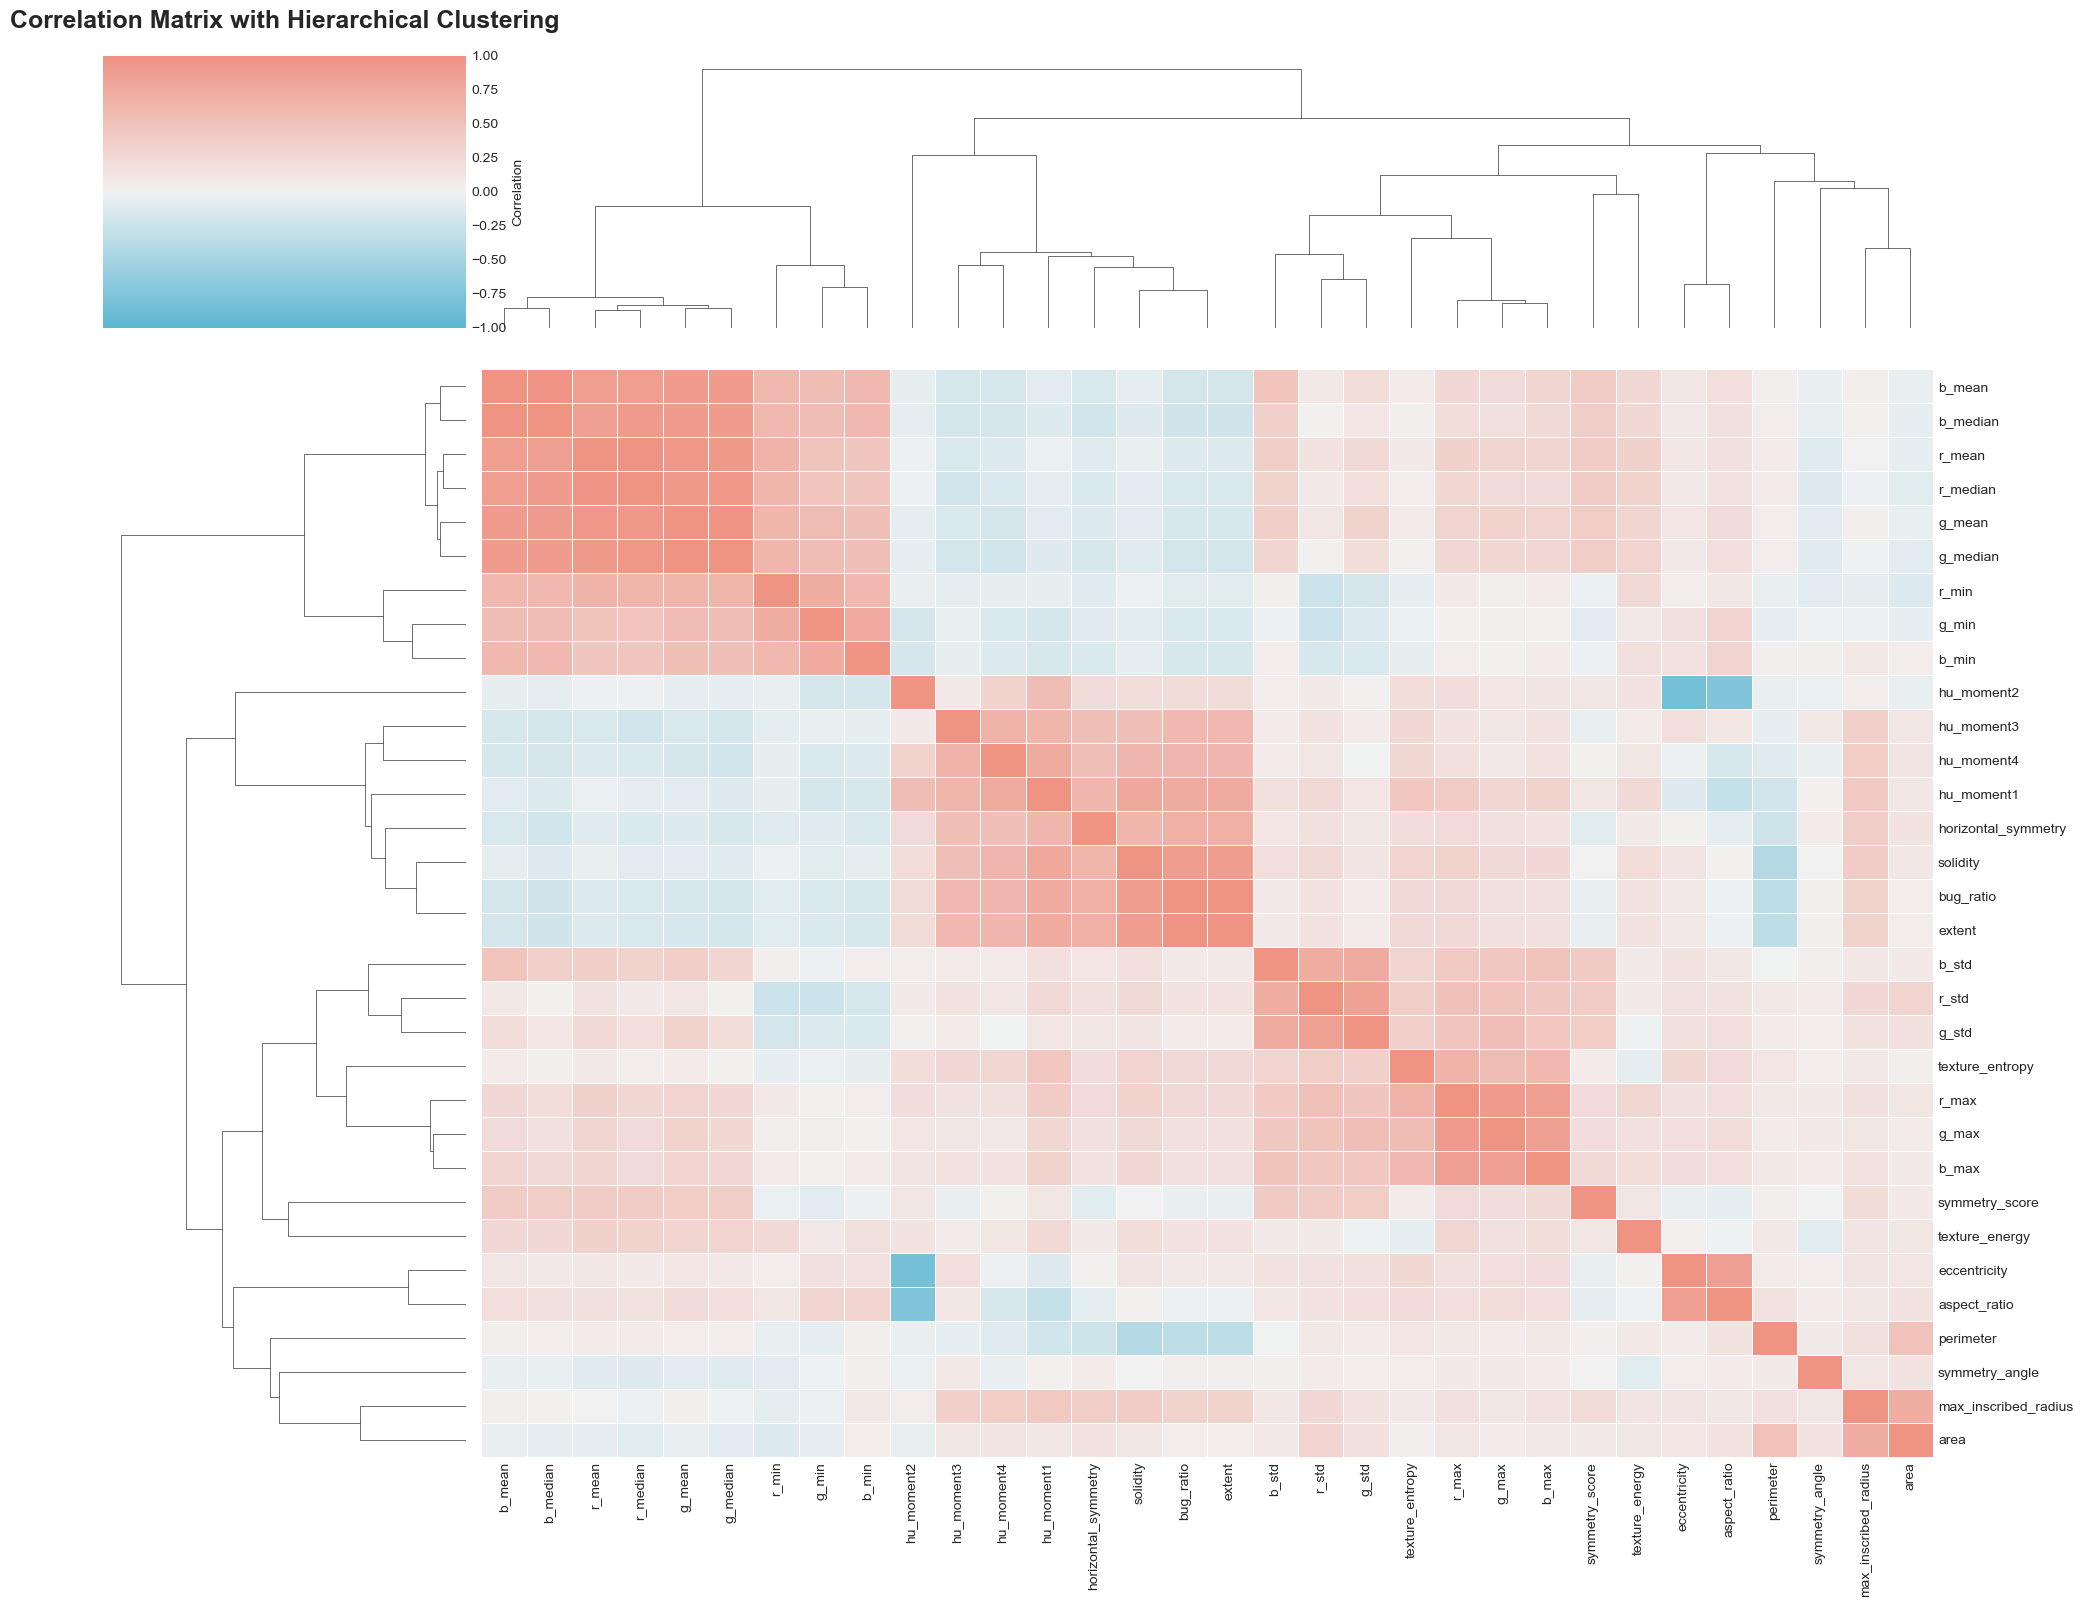


7. Creating visual summary...


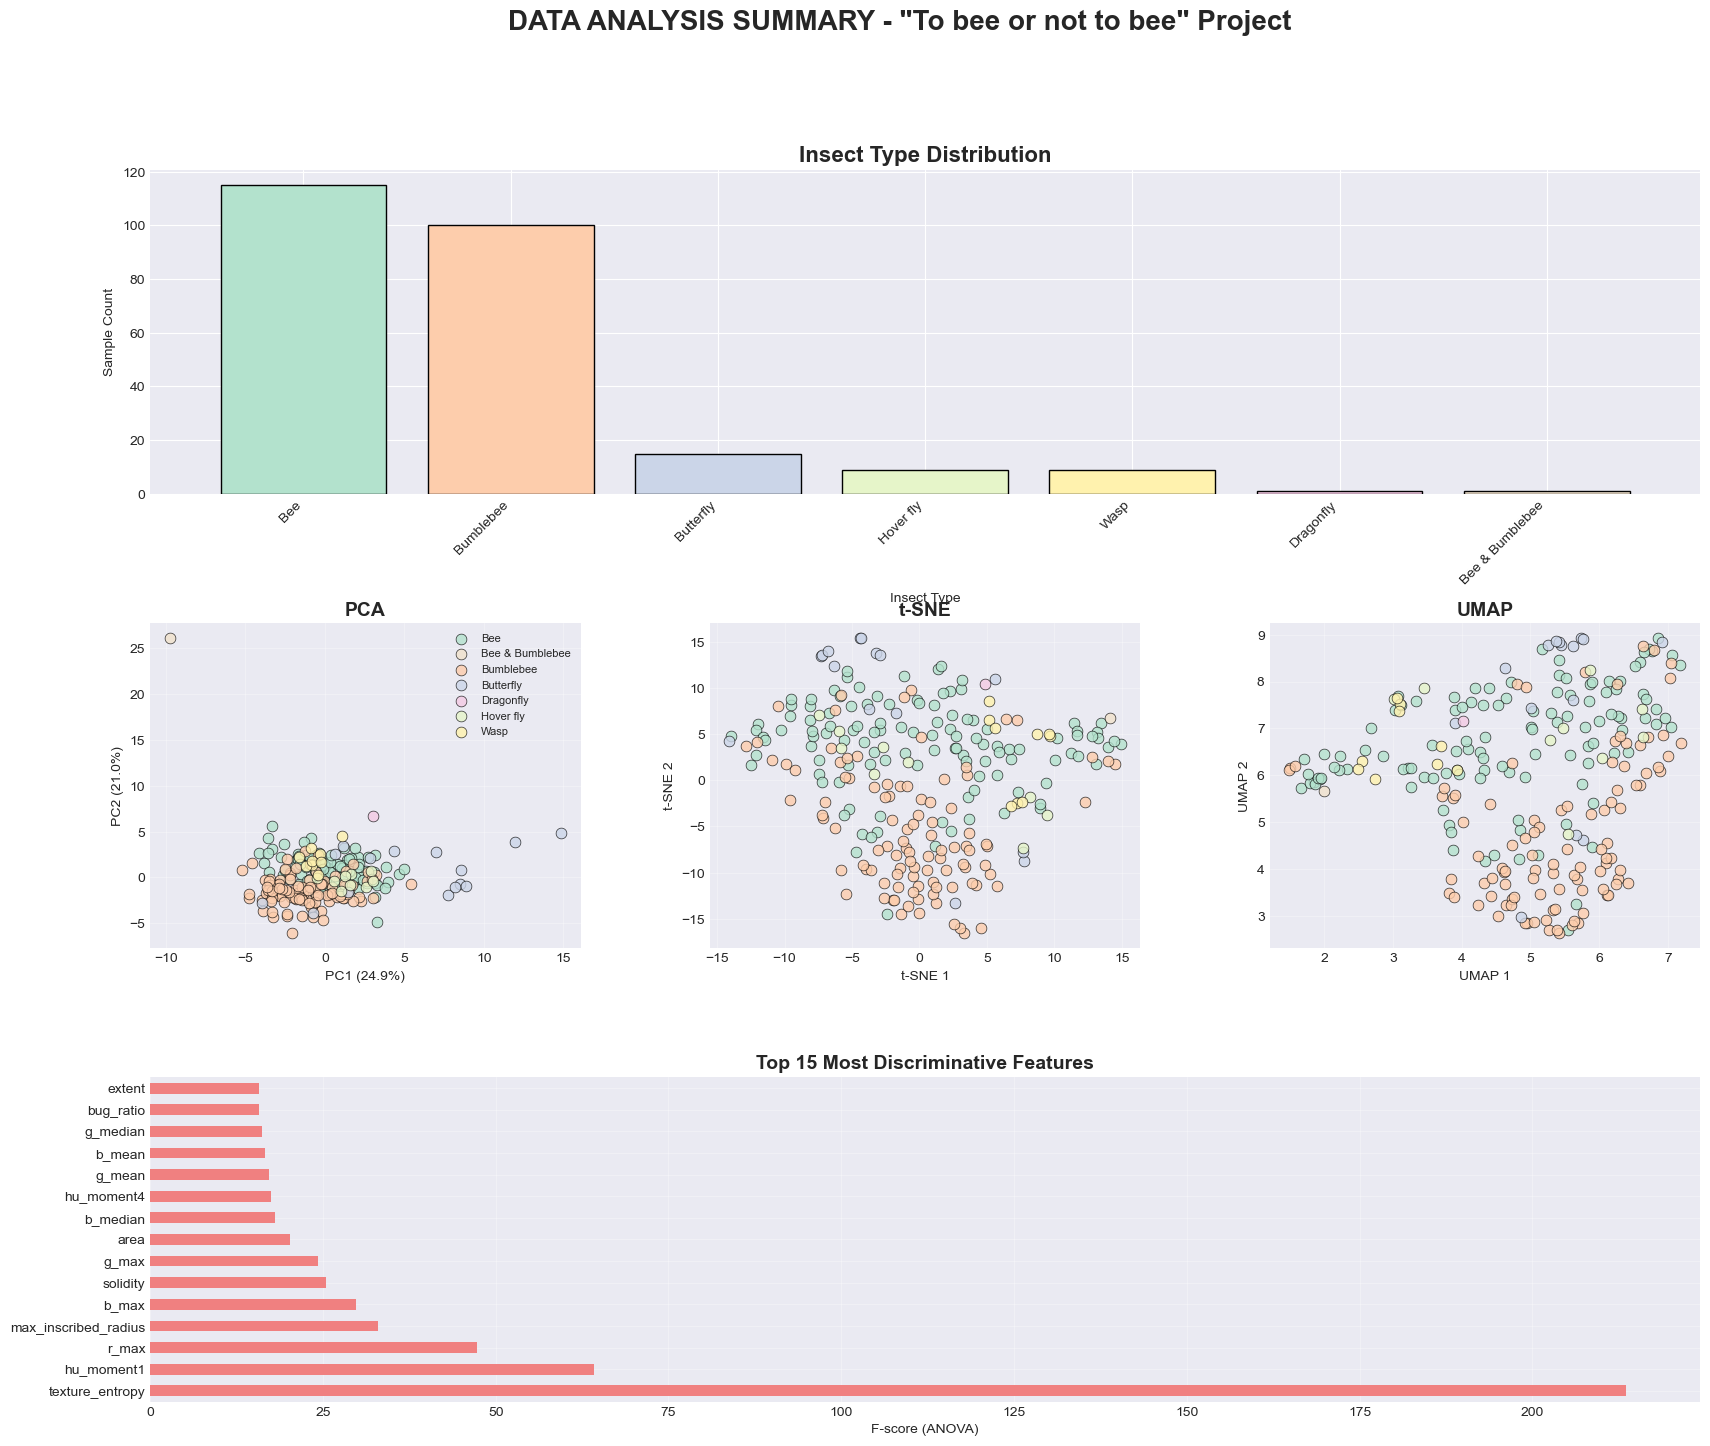


=== PASTEL COLOR LEGEND ===
- Bee: #B3E2CD
- Bumblebee: #FDCDAC
- Butterfly: #CBD5E8
- Dragonfly: #F4CAE4
- Hover fly: #E6F5C9
- Wasp: #FFF2AE
- Bee & Bumblebee: #F1E2CC

ANALYSIS COMPLETED SUCCESSFULLY

Files generated in 'visualization/' folder:
- bug_type_distribution_enhanced.png : Enhanced class distribution
- species_distribution_enhanced.png : Detailed species distribution
- pca_analysis_complete.png : Complete PCA analysis
- feature_importance_pca.png : Feature importance
- nonlinear_projections_comparison.png : Nonlinear projections comparison
- key_features_violin_plots.png : Key feature distributions
- correlation_matrix_clustered.png : Correlation matrix with clustering
- data_analysis_synthesis.png : Complete analysis summary

These visualizations meet project requirements:
✓ Insect type and species distribution
✓ 2D PCA projection with variance analysis
✓ Nonlinear projections (t-SNE, UMAP, Isomap)
✓ Meaningful comments for each visualization



In [2]:
# Enhanced Data Visualization for "To bee or not to bee"
# CORRECTED VERSION WITH DISTINCT PASTEL COLORS

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
import umap
import warnings
warnings.filterwarnings('ignore')

# Global style configuration
plt.style.use('seaborn-v0_8-darkgrid')

# Create visualization directory
os.makedirs('visualization', exist_ok=True)

# ==================== DEFINITION OF DISTINCT PASTEL COLOR PALETTE ====================
def get_bug_color_palette():
    return {
        'Bee': '#B3E2CD',
        'Bumblebee': '#FDCDAC',
        'Butterfly': '#CBD5E8',
        'Dragonfly': '#F4CAE4',
        'Hover fly': '#E6F5C9',
        'Wasp': '#FFF2AE',
        'Bee & Bumblebee': '#F1E2CC'
    }

# Load normalized features
features_df = pd.read_csv('../features_normalized.csv')
print(f"Data loaded: {features_df.shape[0]} samples with {features_df.shape[1]} features")

# ==================== 1. CLASS DISTRIBUTION ====================
print("\n1. Analyzing class distribution...")

# Create figure with subplots for better presentation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 1.1 Insect type distribution (bar chart)
bug_type_counts = features_df['bug_type'].value_counts()
color_palette = get_bug_color_palette()

# Get colors in count order
colors_bars = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]

# Bar chart with fixed colors
bars = ax1.bar(bug_type_counts.index, bug_type_counts.values, 
               color=colors_bars, edgecolor='black', linewidth=1.5)
ax1.set_title('Insect Type Distribution', fontsize=16, fontweight='bold')
ax1.set_xlabel('Insect Type', fontsize=12)
ax1.set_ylabel('Sample Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add values and percentages to bars
total = len(features_df)
for bar, count in zip(bars, bug_type_counts.values):
    height = bar.get_height()
    percentage = 100 * height / total
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.5,
             f'{int(height)}\n({percentage:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# 1.2 Pie chart with same colors
colors_pie = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]
wedges, texts, autotexts = ax2.pie(bug_type_counts.values, 
                                   labels=bug_type_counts.index, 
                                   autopct='%1.1f%%',
                                   colors=colors_pie,
                                   startangle=90,
                                   explode=[0.05 if count < 20 else 0 for count in bug_type_counts.values])
ax2.set_title('Insect Type Proportions', fontsize=16, fontweight='bold')

# Improve readability
for text in texts:
    text.set_fontsize(10)
for autotext in autotexts:
    autotext.set_color('black')  # Changed to black for better visibility on pastel
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.savefig('visualization/bug_type_distribution_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()

# 1.3 Detailed species distribution
plt.figure(figsize=(16, 10))
species_counts = features_df['species'].value_counts()

# Create horizontal plot for better species name display
ax = sns.countplot(data=features_df, y='species', 
                  order=species_counts.index,
                  palette='pastel')  # Using seaborn's pastel palette

# Customize appearance
ax.set_title('Detailed Species Distribution', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Sample Count', fontsize=14)
ax.set_ylabel('Species', fontsize=14)

# Add values with percentage
total = len(features_df)
for i, p in enumerate(ax.patches):
    width = p.get_width()
    percentage = 100 * width / total
    ax.annotate(f'{int(width)} ({percentage:.1f}%)', 
                (width + 0.5, p.get_y() + p.get_height() / 2), 
                ha='left', va='center', fontsize=10)

# Add grid for better readability
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('visualization/species_distribution_enhanced.png', dpi=300, bbox_inches='tight')
plt.show()

# COMMENT for report
print("""
COMMENT - Class Distribution:
- Significant class imbalance: Bee (46%) and Bumblebee (40%) dominate
- Minority classes: Butterfly (6%), Hover fly and Wasp (3.6% each)
- Rare classes: Dragonfly and "Bee & Bumblebee" (0.4% each)
→ This imbalance may affect ML model performance
""")

# ==================== 2. PCA - PRINCIPAL COMPONENT ANALYSIS ====================
print("\n2. PCA analysis...")

# Prepare data
numeric_cols = [col for col in features_df.columns if col not in ['image_id', 'bug_type', 'species']]
X = features_df[numeric_cols].values
y = features_df['bug_type'].values
species = features_df['species'].values

# Apply PCA
pca = PCA()
X_pca_all = pca.fit_transform(X)

# Explained variance analysis
plt.figure(figsize=(15, 5))

# 2.1 Cumulative explained variance
plt.subplot(1, 3, 1)
cumsum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-', linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 2.2 Scree plot
plt.subplot(1, 3, 2)
plt.bar(range(1, 11), pca.explained_variance_ratio_[:10])
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Scree Plot (First 10 Components)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# 2.3 2D PCA projection with fixed colors
plt.subplot(1, 3, 3)
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X)

# Use our color palette
unique_types = np.unique(y)
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=color, label=bug_type, alpha=0.8, s=80, 
               edgecolors='black', linewidth=0.5)

# Add class centroids
for bug_type in unique_types:
    mask = y == bug_type
    if np.sum(mask) > 0:
        centroid = X_pca[mask].mean(axis=0)
        plt.annotate(bug_type, centroid, 
                    fontsize=12, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
plt.title('2D PCA Projection', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('visualization/pca_analysis_complete.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"""
COMMENT - PCA Analysis:
- First 2 components explain {pca_2d.explained_variance_ratio_.sum():.1%} of variance
- {np.argmax(cumsum_var >= 0.95) + 1} components needed to explain 95% of variance
- Projection shows overlap between Bee and Bumblebee, suggesting similar features
- Minority classes (Butterfly, Dragonfly) appear better separated
""")

# ==================== 3. VISUALIZATION OF MOST DISCRIMINATIVE FEATURES ====================
print("\n3. Analyzing discriminative features...")

# Identify most important features via PCA
loadings = pca_2d.components_.T * np.sqrt(pca_2d.explained_variance_)
loading_matrix = pd.DataFrame(
    loadings,
    columns=['PC1', 'PC2'],
    index=numeric_cols
)

# Calculate total importance
loading_matrix['importance'] = np.sqrt(loading_matrix['PC1']**2 + loading_matrix['PC2']**2)
top_features = loading_matrix.nlargest(10, 'importance')

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# 3.1 Biplot of loadings
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.axhline(0, color='gray', linestyle='--', alpha=0.5)
ax1.axvline(0, color='gray', linestyle='--', alpha=0.5)

# Draw vectors for top features with pastel colors
pastel_colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_features)))
for idx, ((feature, row), color) in enumerate(zip(top_features.iterrows(), pastel_colors)):
    ax1.arrow(0, 0, row['PC1']/3, row['PC2']/3, 
             head_width=0.02, head_length=0.02, 
             fc=color, ec=color)
    ax1.annotate(feature, (row['PC1']/3, row['PC2']/3), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax1.set_xlabel('PC1 Loading', fontsize=12)
ax1.set_ylabel('PC2 Loading', fontsize=12)
ax1.set_title('Biplot - Feature Contributions', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# 3.2 Feature importance
top_features['importance'].plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_xlabel('Importance (loading vector norm)', fontsize=12)
ax2.set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('visualization/feature_importance_pca.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 4. NONLINEAR PROJECTIONS ====================
print("\n4. Calculating nonlinear projections...")

# Create large figure to compare all projections
fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# 4.1 t-SNE with different perplexities
print("Calculating t-SNE...")
perplexities = [5, 30]
for i, perp in enumerate(perplexities):
    ax = axes[0, i]
    tsne = TSNE(n_components=2, random_state=42, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    
    for bug_type in unique_types:
        mask = y == bug_type
        color = color_palette.get(bug_type, '#808080')
        ax.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                  c=color, label=bug_type, alpha=0.8, s=80, 
                  edgecolors='black', linewidth=0.5)
    
    ax.set_title(f't-SNE (perplexity={perp})', fontsize=14, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

# 4.2 UMAP
print("Calculating UMAP...")
ax = axes[1, 0]
reducer = umap.UMAP(random_state=42, n_neighbors=15)
X_umap = reducer.fit_transform(X)

for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax.scatter(X_umap[mask, 0], X_umap[mask, 1], 
              c=color, label=bug_type, alpha=0.8, s=80, 
              edgecolors='black', linewidth=0.5)

ax.set_title('UMAP (n_neighbors=15)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

# 4.3 Isomap
print("Calculating Isomap...")
ax = axes[1, 1]
isomap = Isomap(n_components=2, n_neighbors=10)
X_isomap = isomap.fit_transform(X)

for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax.scatter(X_isomap[mask, 0], X_isomap[mask, 1], 
              c=color, label=bug_type, alpha=0.8, s=80, 
              edgecolors='black', linewidth=0.5)

ax.set_title('Isomap (n_neighbors=10)', fontsize=14, fontweight='bold')
ax.legend(loc='best', fontsize=10)
ax.grid(True, alpha=0.3)

plt.suptitle('Comparison of Nonlinear Projections', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.savefig('visualization/nonlinear_projections_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("""
COMMENT - Nonlinear Projections:
- t-SNE (perplexity=5): Forms very tight local clusters, risk of over-segmentation
- t-SNE (perplexity=30): Better global view, Bee and Bumblebee form a continuum
- UMAP: Excellent separation of minority classes (Butterfly, Dragonfly)
- Isomap: Better preserves global structure, shows Bee/Bumblebee proximity
→ Nonlinear methods confirm difficulty separating Bee and Bumblebee
""")

# ==================== 5. IN-DEPTH ANALYSIS OF KEY FEATURES ====================
print("\n5. Detailed analysis of key features...")

# Select most discriminative features
key_features = ['bug_ratio', 'eccentricity', 'symmetry_angle', 'r_mean', 'g_mean', 'b_mean']

# Create violin plot matrix
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Create data for each type
    data_list = []
    positions = []
    colors_violin = []
    
    for j, bug_type in enumerate(unique_types):
        data = features_df[features_df['bug_type'] == bug_type][feature].values
        if len(data) > 0:
            data_list.append(data)
            positions.append(j)
            colors_violin.append(color_palette.get(bug_type, '#808080'))
    
    # Violin plot
    if data_list:
        parts = ax.violinplot(data_list, positions=positions,
                             showmeans=True, showmedians=True)
        
        # Customize colors
        for pc, color in zip(parts['bodies'], colors_violin):
            pc.set_facecolor(color)
            pc.set_alpha(0.8)
            pc.set_edgecolor('black')
        
        # Colors for other elements
        for partname in ['cbars', 'cmins', 'cmaxes', 'cmeans', 'cmedians']:
            if partname in parts:
                parts[partname].set_color('black')
                parts[partname].set_linewidth(1.5)
    
    ax.set_xticks(range(len(unique_types)))
    ax.set_xticklabels(unique_types, rotation=45, ha='right')
    ax.set_title(f'{feature}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Distribution of Key Features by Insect Type', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('visualization/key_features_violin_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 6. IMPROVED CORRELATION MATRIX ====================
print("\n6. Correlation analysis...")

# Calculate correlation matrix
correlation_matrix = features_df[numeric_cols].corr()

# Enhanced visualization
plt.figure(figsize=(20, 16))

# Use diverging pastel palette
cmap = sns.diverging_palette(220, 20, as_cmap=True, l=70)  # l=70 for more pastel

# Heatmap with dendrogram
sns.clustermap(correlation_matrix, 
               mask=None,
               cmap=cmap, 
               vmin=-1, vmax=1,
               center=0,
               square=True,
               linewidths=0.5,
               cbar_kws={"shrink": 0.8, "label": "Correlation"},
               figsize=(20, 16))

plt.title('Correlation Matrix with Hierarchical Clustering', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('visualization/correlation_matrix_clustered.png', dpi=300, bbox_inches='tight')
plt.show()

# ==================== 7. FINAL SUMMARY (CORRECTED) ====================
print("\n7. Creating visual summary...")

# First calculate important features
from sklearn.feature_selection import f_classif
feature_importance_df = pd.DataFrame()
for feature in numeric_cols:
    f_score, _ = f_classif(features_df[[feature]].values, y)
    feature_importance_df.loc[feature, 'F-score'] = f_score[0]

top_15_features = feature_importance_df.nlargest(15, 'F-score')

# Create summary figure with correct size
fig = plt.figure(figsize=(20, 16))

# Define grid correctly
gs = fig.add_gridspec(3, 3, height_ratios=[1, 1, 1], hspace=0.4, wspace=0.3)

# 7.1 Class distribution (top row, full width)
ax1 = fig.add_subplot(gs[0, :])
colors_summary = [color_palette.get(bug_type, '#808080') for bug_type in bug_type_counts.index]
bars = ax1.bar(bug_type_counts.index, bug_type_counts.values, color=colors_summary, edgecolor='black')
ax1.set_title('Insect Type Distribution', fontsize=16, fontweight='bold')
ax1.set_ylabel('Sample Count')
ax1.set_xlabel('Insect Type')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 7.2 PCA
ax2 = fig.add_subplot(gs[1, 0])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax2.scatter(X_pca[mask, 0], X_pca[mask, 1], 
               c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.1%})')
ax2.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.1%})')
ax2.set_title('PCA', fontsize=14, fontweight='bold')
ax2.legend(fontsize=8, loc='best')
ax2.grid(True, alpha=0.3)

# 7.3 t-SNE (using pre-calculated X_tsne)
ax3 = fig.add_subplot(gs[1, 1])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax3.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
               c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax3.set_title('t-SNE', fontsize=14, fontweight='bold')
ax3.set_xlabel('t-SNE 1')
ax3.set_ylabel('t-SNE 2')
ax3.grid(True, alpha=0.3)

# 7.4 UMAP
ax4 = fig.add_subplot(gs[1, 2])
for bug_type in unique_types:
    mask = y == bug_type
    color = color_palette.get(bug_type, '#808080')
    ax4.scatter(X_umap[mask, 0], X_umap[mask, 1], 
               c=color, label=bug_type, alpha=0.8, s=60, edgecolors='black', linewidth=0.5)
ax4.set_title('UMAP', fontsize=14, fontweight='bold')
ax4.set_xlabel('UMAP 1')
ax4.set_ylabel('UMAP 2')
ax4.grid(True, alpha=0.3)

# 7.5 Important features (bottom row, full width)
ax5 = fig.add_subplot(gs[2, :])
top_15_features.plot(kind='barh', ax=ax5, color='lightcoral', legend=False)
ax5.set_xlabel('F-score (ANOVA)')
ax5.set_title('Top 15 Most Discriminative Features', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

plt.suptitle('DATA ANALYSIS SUMMARY - "To bee or not to bee" Project', 
             fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig('visualization/data_analysis_synthesis.png', dpi=300, bbox_inches='tight')
plt.show()

# Color legend
print("\n=== PASTEL COLOR LEGEND ===")
for bug_type, color in color_palette.items():
    if bug_type in unique_types:
        print(f"- {bug_type}: {color}")

print("\n" + "="*80)
print("ANALYSIS COMPLETED SUCCESSFULLY")
print("="*80)
print(f"""
Files generated in 'visualization/' folder:
- bug_type_distribution_enhanced.png : Enhanced class distribution
- species_distribution_enhanced.png : Detailed species distribution
- pca_analysis_complete.png : Complete PCA analysis
- feature_importance_pca.png : Feature importance
- nonlinear_projections_comparison.png : Nonlinear projections comparison
- key_features_violin_plots.png : Key feature distributions
- correlation_matrix_clustered.png : Correlation matrix with clustering
- data_analysis_synthesis.png : Complete analysis summary

These visualizations meet project requirements:
✓ Insect type and species distribution
✓ 2D PCA projection with variance analysis
✓ Nonlinear projections (t-SNE, UMAP, Isomap)
✓ Meaningful comments for each visualization
""")